<a href="https://colab.research.google.com/github/mayankkumar15/Handwritten-Digit-Classifier/blob/main/HandwrittenDigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescaling the images through the range [0,255] to [0.0,1.0] 
X_train, X_test = X_train[..., np.newaxis]/255, X_test[..., np.newaxis]/255


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# first half of trained data is original images and the second half is flipped images
X_train = [i for i in X_train[0:30000:1]] + [1-i for i in X_train[:-30001:-1]]
X_train = np.asarray(X_train)

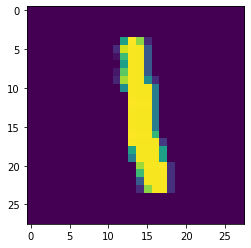

In [ ]:
plt.imshow(tf.squeeze(X_train[6]))

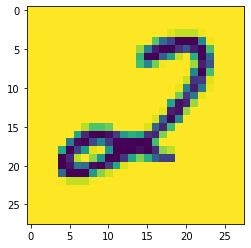

In [ ]:
plt.imshow(tf.squeeze(X_train[30008]))

In [ ]:
# Flattening the test data image in order to create a single vector
X_test_converted = X_test.reshape(len(X_test), 28*28)

In [ ]:
# Model
model = keras.Sequential()


layer_1 = keras.layers.Flatten(input_shape=(28, 28))
layer_2 = keras.layers.Dense(200,activation='relu')
layer_3 = keras.layers.Dense(10, activation='softmax')

model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["sparse_categorical_accuracy"])

batchsize = [200, 500]
error_value = []
for i in batchsize:
    print("batch size " + str(i))
    model.fit(X_train, y_train, epochs=72,batch_size=int(i))
    scores = model.evaluate(X_test_converted, y_test, batch_size=int(i))
    print("The found Error is  %.2f%%" % (100-scores[1]*100))
    print("--------- next batch ---------")
    error_value.append(100-scores[1]*100)
print(error_value)

batch size 200
Epoch 1/72
300/300 [==============================] - 2s 5ms/step - loss: 1.4399 - sparse_categorical_accuracy: 0.4844
Epoch 2/72
300/300 [==============================] - 2s 5ms/step - loss: 1.2644 - sparse_categorical_accuracy: 0.5211
Epoch 3/72
300/300 [==============================] - 2s 5ms/step - loss: 1.2329 - sparse_categorical_accuracy: 0.5314
Epoch 4/72
300/300 [==============================] - 2s 5ms/step - loss: 1.2152 - sparse_categorical_accuracy: 0.5365
Epoch 5/72
300/300 [==============================] - 2s 5ms/step - loss: 1.2020 - sparse_categorical_accuracy: 0.5410
Epoch 6/72
300/300 [==============================] - 2s 5ms/step - loss: 1.1925 - sparse_categorical_accuracy: 0.5441
Epoch 7/72
300/300 [==============================] - 2s 5ms/step - loss: 1.1863 - sparse_categorical_accuracy: 0.5455
Epoch 8/72
300/300 [==============================] - 2s 5ms/step - loss: 1.1792 - sparse_categorical_accuracy: 0.5477
Epoch 9/72
300/300 [=============

In [ ]:
scores

[0.08574838936328888, 0.9793000221252441]

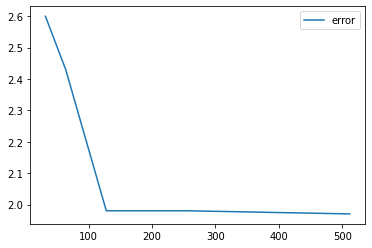

In [ ]:

#plot of the error observed
df = pd.DataFrame({'error':error_value},index = batchsize)
line = df.plot.line()